In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import quad
from scipy.interpolate import interp1d

from utils import *
from blade_design import blade_design
from bemt import bemt

### Blade Design with diferent number of blades

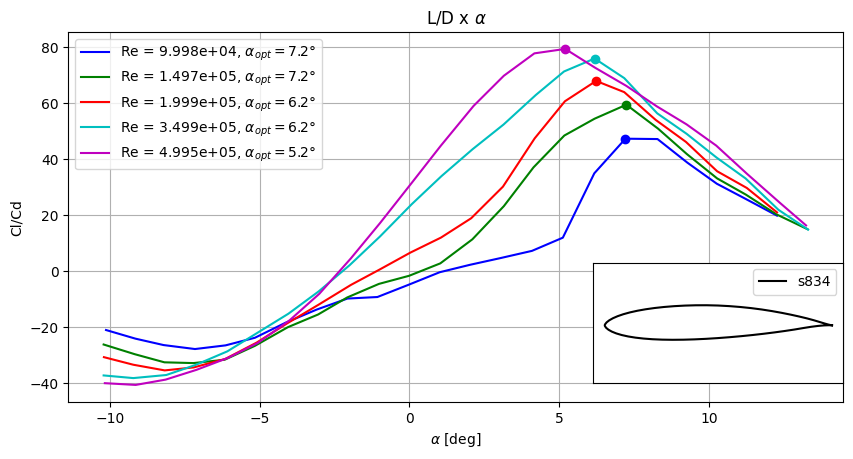

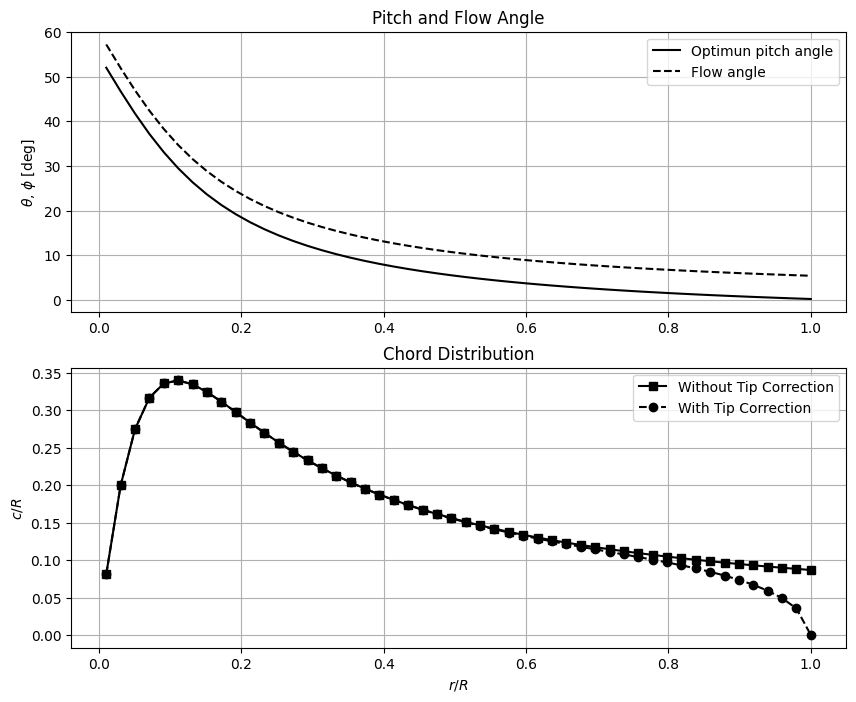

In [2]:
rotor_uniform = blade_design('s834', 7, 2, number_of_sections=50,plot=True)


### Validate Cp curve for Optimum Blade design

[0.28812831 0.32096026 0.34896809 0.37299834 0.3937275  0.41170289
 0.42737008 0.4410933  0.45317142 0.46385064 0.4733346  0.48179242
 0.48936523 0.4961713  0.5023102  0.50786611 0.51291058 0.51750459
 0.52170043 0.52554304 0.52907126 0.53231874 0.53531477 0.53808491
 0.54065157 0.54303444 0.54525088 0.54731624 0.54924415 0.55104671
 0.55273472 0.55431784 0.55580472 0.55720314 0.55852009 0.5597619
 0.56093427 0.56204238 0.56309092 0.56408417 0.56502601 0.56592001
 0.56676941 0.56757718 0.56834606 0.56907855 0.56977695 0.57044339
 0.57107983 0.57168808 0.57226981 0.57282657 0.57335981 0.57387085
 0.57436093 0.57483122 0.57528277 0.5757166  0.57613365 0.57653477
 0.57692079 0.57729248 0.57765054 0.57799566 0.57832846 0.57864953
 0.57895943 0.57925868 0.57954778 0.57982718 0.58009733 0.58035864
 0.5806115  0.58085628 0.58109332 0.58132295 0.58154549 0.58176124
 0.58197046 0.58217343 0.5823704  0.58256161 0.58274728 0.58292764
 0.58310288 0.58327321 0.58343881 0.58359985 0.5837565  0.58390

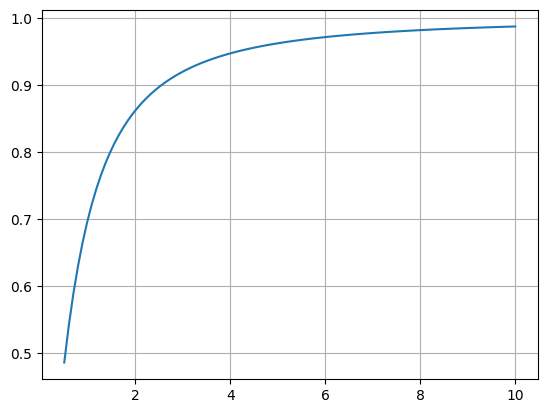

In [8]:
TSR = np.linspace(0.5, 10,  100)
Cp = np.zeros(len(TSR))
for i, tsr in enumerate(TSR):
    rotor = blade_design('s834', tsr, 2, number_of_sections=50, tip_correction_model='', plot = False)
    
    a = rotor['a'].to_numpy() 
    a_line = rotor['a_line'].to_numpy() 
    x = rotor['x'].to_numpy() 
    
    func = interp1d(x, a_line*(1 -a) *x**3, kind='cubic')
    Cp[i] = 8/(tsr**2) * quad(func, x[0], x[-1])[0]
    # Cp[i] = 8/(tsr**2) * np.trapezoid(a_line*(1 - a)*x**3, x)

plt.plot(TSR, 27*Cp/16)
plt.grid()
plt.show()

### Coefficients Extrapolation

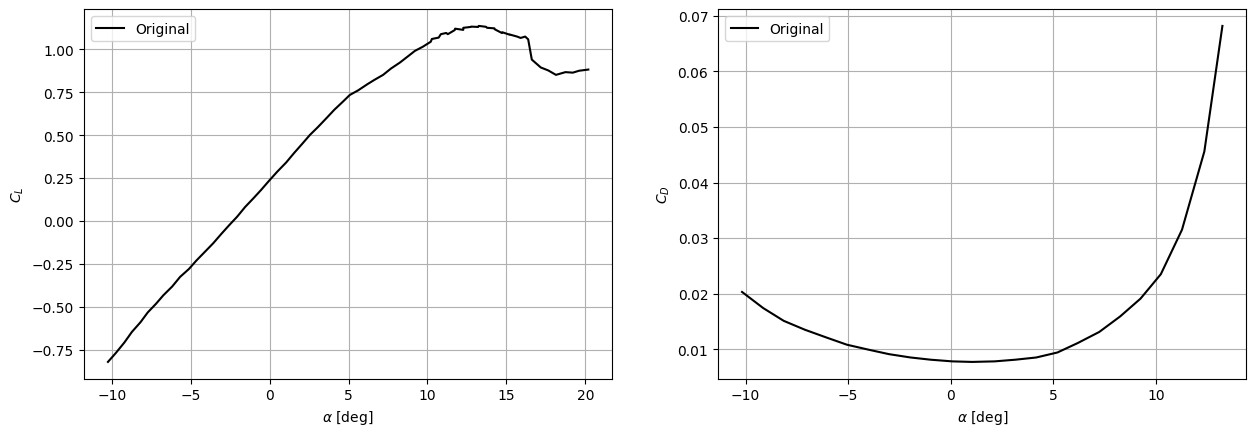

In [14]:
rotor = blade_design('s834', 7, 2, number_of_sections=50,plot=False)
airfoil_name = 's834'
c_lift_drag = process_file(airfoil_path.joinpath(f'{airfoil_name}_c_drg.txt'))
c_lift = process_file(airfoil_path.joinpath(f'{airfoil_name}_c_lft.txt'))

re_drg = list(c_lift_drag.keys())[-1]
re_lft = list(c_lift.keys())[-2:]

Cd = c_lift_drag[re_drg][0][:, 2]
alpha_cd = c_lift_drag[re_drg][0][:, 0]

Cl = np.concatenate([c_lift[re][0][:,1] for re in re_lft])  
alpha_cl = np.concatenate([c_lift[re][0][:,0] for re in re_lft])  

arg = np.argsort(alpha_cl)
alpha_cl = np.sort(alpha_cl)
Cl = Cl[arg]

# print(re_lft, re_drg)
# print(len(c_lift[re_lft][0][:, 0]))

# df_extra = coefficients_extrapolation(c_lift[re_lft][0],c_lift_drag[re_drg][0], rotor)
# alpha = np.deg2rad(np.concatenate((np.linspace(-90, -15, 100), np.linspace(15, 90, 100))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 4.8])

# ax1.plot(df_extra['alpha'],  df_extra['Cl'], 'r--', label = 'Extrapolation')
ax1.plot(alpha_cl,  Cl, 'k',  label = 'Original')

ax1.set_xlabel(r'$\alpha$ [deg]')
ax1.set_ylabel(r'$C_L$')
ax1.legend()
ax1.grid()

# ax2.plot(df_extra['alpha'],  df_extra['Cd'], 'r--', label = 'Extrapolation')
ax2.plot(alpha_cd,  Cd, 'k', label = 'Original')

ax2.set_xlabel(r'$\alpha$ [deg]')
ax2.set_ylabel(r'$C_D$')
ax2.legend()
ax2.grid()

plt.show()



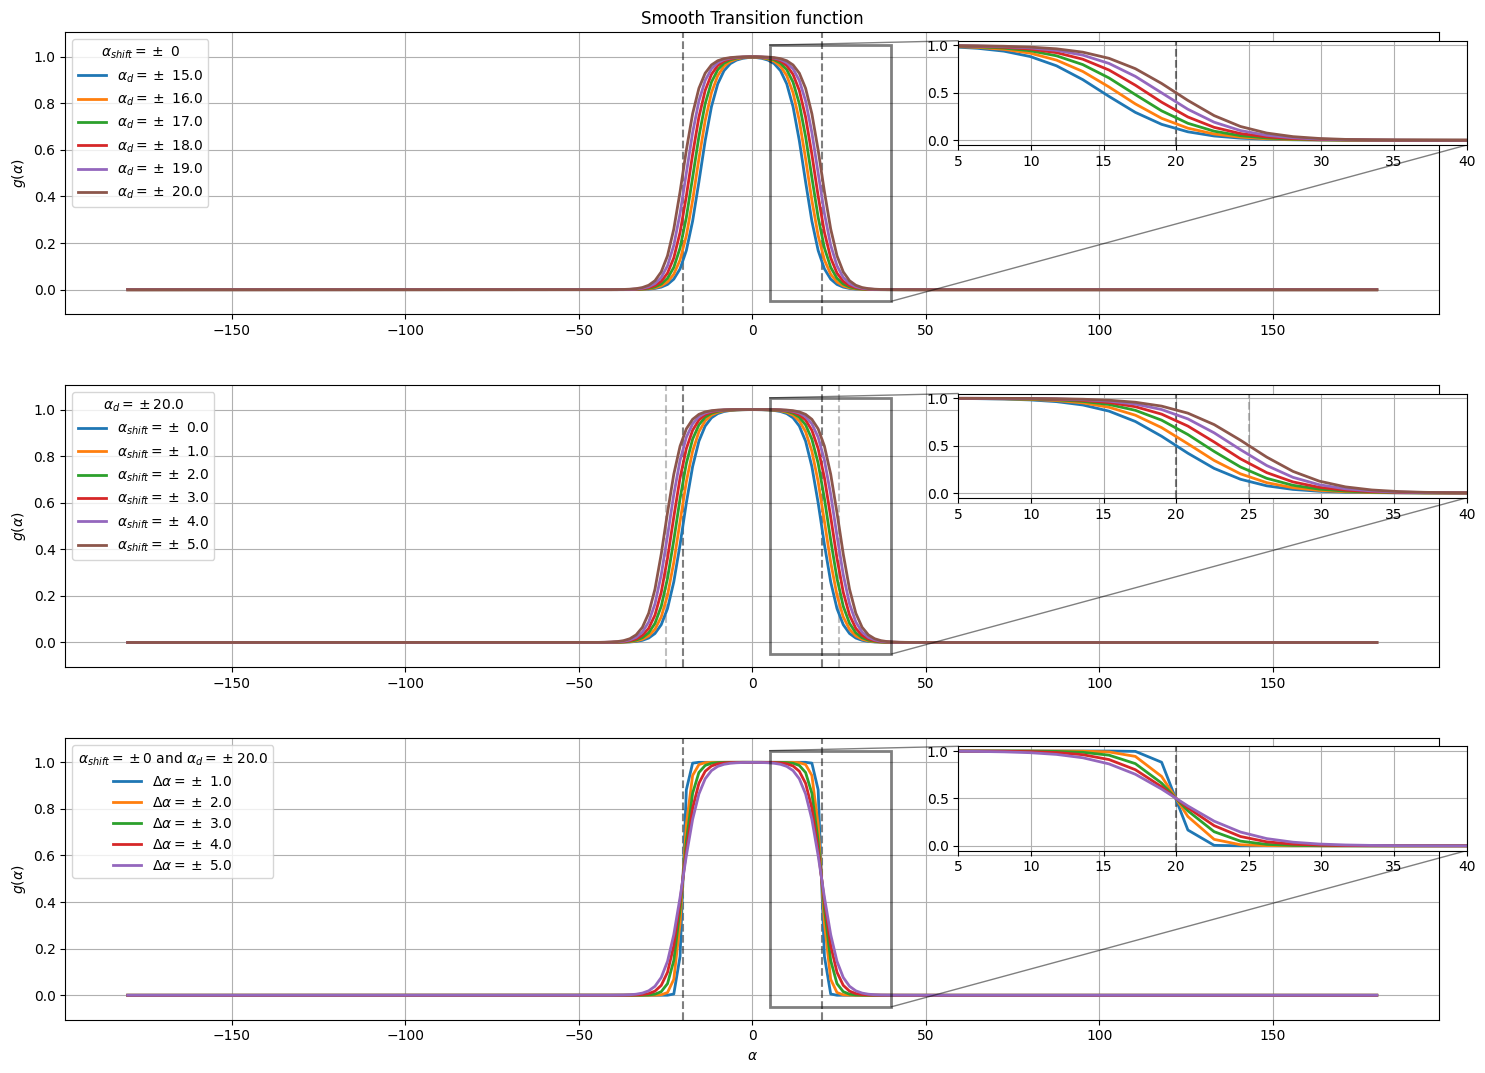

In [42]:
alpha_d = np.deg2rad(20)
alpha_shift = np.deg2rad(5)
delta_alpha = np.deg2rad(5)
alpha = np.linspace(-np.pi, np.pi, 200)


alpha_d_vec = np.deg2rad(np.arange(15, 21))
alpha_shift_vec = np.deg2rad(np.arange(0,6))
delta_alpha_vec = np.deg2rad(np.arange(1, 6))
alpha_vec = np.linspace(-np.pi, np.pi, 200)

g = lambda alpha, alpha_d = alpha_d, alpha_shift = alpha_shift, delta_alpha = delta_alpha: 0.5*(1+np.tanh((alpha_d + alpha_shift  - np.abs(alpha))/delta_alpha))

fig, axis = plt.subplots(3, 1, figsize = [15, 11])
fig.tight_layout(pad=3.0)

for i, ax in enumerate(axis):
    
    # zoomed plot
    axins = ax.inset_axes([0.65, 0.6, 0.37, 0.37])
    
    # Vertical Lines
    ax.axvline(np.rad2deg(alpha_d), linestyle='--', alpha = 0.5, color='black')
    ax.axvline(-np.rad2deg(alpha_d), linestyle='--', alpha = 0.5, color='black')
    
    
    axins.axvline(np.rad2deg(alpha_d), linestyle='--', alpha = 0.5, color='black')
    axins.axvline(-np.rad2deg(alpha_d), linestyle='--', alpha = 0.5, color='black')
    
    if i == 1:
        ax.axvline(np.rad2deg(alpha_d + alpha_shift), linestyle='--', alpha = 0.5, color='gray')
        ax.axvline(-np.rad2deg(alpha_d + alpha_shift), linestyle='--', alpha = 0.5, color='gray')
    
        axins.axvline(np.rad2deg(alpha_d + alpha_shift), linestyle='--', alpha = 0.5, color='gray')
        axins.axvline(-np.rad2deg(alpha_d +alpha_shift), linestyle='--', alpha = 0.5, color='gray')


    # Effect of change parameter in smooth transition function
    
    if i == 0:
        for alpha_d in alpha_d_vec:
            ax.plot(np.rad2deg(alpha), g(alpha, alpha_d = alpha_d, alpha_shift=0), linewidth=2, label=r'$\alpha_d = \pm$ ' + f'{np.rad2deg(alpha_d):.1f}')
            axins.plot(np.rad2deg(alpha), g(alpha, alpha_d=alpha_d, alpha_shift=0), linewidth=2)
            ax.set_title('Smooth Transition function')
            title = r'$\alpha_{shift} = \pm$ 0'
    elif i == 1:
        for alpha_shift in alpha_shift_vec:
            ax.plot(np.rad2deg(alpha), g(alpha, alpha_shift = alpha_shift), linewidth=2, label=r'$\alpha_{shift} = \pm$ ' + f'{np.rad2deg(alpha_shift):.1f}')
            axins.plot(np.rad2deg(alpha), g(alpha, alpha_shift=alpha_shift), linewidth=2)
            title = r'$\alpha_d = \pm $' + f'{np.rad2deg(alpha_d):.1f}'
    elif i == 2:
        for delta_alpha in delta_alpha_vec:
            ax.plot(np.rad2deg(alpha), g(alpha, alpha_shift=0, delta_alpha = delta_alpha), linewidth=2, label=r'$\Delta \alpha = \pm$ ' + f'{np.rad2deg(delta_alpha):.1f}')
            axins.plot(np.rad2deg(alpha), g(alpha, alpha_shift=0, delta_alpha=delta_alpha), linewidth=2)
            ax.set_xlabel(r'$\alpha$')
            title = r'$\alpha_{shift} = \pm 0$ and $\alpha_d = \pm $' + f'{np.rad2deg(alpha_d):.1f}'
    # else:
    #     ax.plot(np.rad2deg(alpha), g(alpha), linewidth=2, color='black', label=r'$g(\alpha)$')


    ax.set_ylabel(r'$g(\alpha)$')
    # ax.set_xticks(np.arange(-180,190,10))
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    ax.legend(loc = 2, title = title)
    ax.grid()

    axins.set_xlim(5, 40)
    axins.grid()

    ax.indicate_inset_zoom(axins, linewidth=2, edgecolor="black")

plt.show()


### Validate BEMT

In [ ]:

# rotor